In [2]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from extract import MatchDataLoader
from config import setup_logging

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/data_exploration.log")

# 1. Load data

In [3]:
# Initialize data loader
loader = MatchDataLoader()

# Load all data
events_data, player_data, tracking_data, mapping_data = loader.load_all_data()

print(f"Events data shape: {events_data.shape}")
print(f"Player data shape: {player_data.shape}")
print(f"Tracking data shape: {tracking_data.shape}")
print(f"Mapping data keys: {len(mapping_data)}")

2025-11-09 12:58:46,324 - extract.data_loading - INFO - ✓ Loaded 1710 events from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-09 12:58:46,325 - extract.data_loading - INFO - ✓ Loaded 32 players from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-09 12:58:47,121 - extract.data_loading - INFO - ✓ Loaded 145567 tracking entries from ../data/20251010-Belgium-North-Macedonia/tracking.pkl
2025-11-09 12:58:47,123 - extract.data_loading - INFO - ✓ Loaded mapping data from ../data/20251010-Belgium-North-Macedonia/mapping.json


Events data shape: (1710, 46)
Player data shape: (32, 8)
Tracking data shape: (145567, 138)
Mapping data keys: 10


# 2. Exploring data

## 2.1 Event data

In [4]:
events_data.head()

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
0,0,-1,1760121900000,NOT_APPLICABLE,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,17,FORMATION,1700,TEAM_STARTING_FORMATION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
1,1,-1,1760121900000,NOT_APPLICABLE,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,17,FORMATION,1700,TEAM_STARTING_FORMATION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
2,2,95,1760121900000,Thibaut Courtois,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,0,GK,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
3,3,20,1760121900000,Zeno Koen Debast,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,4,CB,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
4,4,33,1760121900000,Arthur Nicolas Theate,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,18,POSITION,1800,PLAYER_STARTING_POSITION,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,4,CB,-2,UNKNOWN,1,FIRST_HALF,0,0,0.0,0.0,0.0,0.0,-1,-1,-1,NOT_APPLICABLE,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False


In [5]:
events_data[(events_data["sequenceId"] == 1) | (events_data["sequenceId"] == 2)][["eventId", "teamName", "sequenceId", "sequenceEvent", "sequenceStart", "sequenceEnd", "startTimeMs", "endTimeMs", "baseTypeName", "subTypeName", "resultName", "shotTypeName", "foulTypeName", "positionTypeName", "formationTypeName", "possessionTypeName"]]

,eventId,teamName,sequenceId,sequenceEvent,sequenceStart,sequenceEnd,startTimeMs,endTimeMs,baseTypeName,subTypeName,resultName,shotTypeName,foulTypeName,positionTypeName,formationTypeName,possessionTypeName
24,24,Belgium,1,1,True,False,2167,4214,PASS,KICK_OFF,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,CMF,UNKNOWN,FREE_KICK
25,25,Belgium,1,1,False,False,5660,7902,PASS,PASS,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,GK,UNKNOWN,FREE_KICK
26,26,Belgium,1,1,False,False,8102,8102,DEFENSIVE_DUEL,AIR_CHALLENGE,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,CMF,UNKNOWN,FREE_KICK
28,28,North Macedonia,1,1,False,True,12257,12257,BALL_DEAD,BALL_OUT_FOR_THROW_IN,NOT_APPLICABLE,NOT_APPLICABLE,NOT_APPLICABLE,CB,UNKNOWN,FREE_KICK
29,29,Belgium,2,1,True,False,25380,26050,PASS,THROW_IN,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,RB,UNKNOWN,THROW_IN
30,30,Belgium,2,1,False,False,26250,27140,PASS,PASS,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,CMF,UNKNOWN,THROW_IN
31,31,Belgium,2,1,False,False,27750,28750,PASS,PASS,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,RB,UNKNOWN,THROW_IN
32,32,Belgium,2,1,False,False,30468,34187,PASS,PASS,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,CB,UNKNOWN,THROW_IN
33,33,Belgium,2,1,False,False,34840,36773,PASS,PASS,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,GK,UNKNOWN,THROW_IN
34,34,Belgium,2,1,False,False,36773,39613,DRIBBLE,CARRY,SUCCESSFUL,NOT_APPLICABLE,NOT_APPLICABLE,CB,UNKNOWN,THROW_IN


In [6]:
events_data[events_data["eventId"] == 24]["metrics"].values[0]

{'length': 19.962,
 'forwardDisplacement': -19.95,
 'lateralDisplacement': 0.68,
 'angle': -91.952,
 'goalProgression': 19.953,
 'xG': 0.0,
 'xA': 0.0,
 'PSxG': 0.0,
 'xS': 0.0}

In [7]:
events_data[events_data["eventId"] == 24]["descriptives"].values[0]

{'startZone': '3C', 'endZone': '2C', 'startThird': 2, 'endThird': 1}

In [8]:
events_data.columns

Index(['eventId', 'playerId', 'timestamp', 'playerName', 'groupId',
       'groupName', 'teamId', 'teamName', 'receiverId', 'receiverName',
       'receiverTeamId', 'receiverTeamName', 'baseTypeId', 'baseTypeName',
       'subTypeId', 'subTypeName', 'resultId', 'resultName', 'bodyPartId',
       'bodyPartName', 'shotTypeId', 'shotTypeName', 'foulTypeId',
       'foulTypeName', 'positionTypeId', 'positionTypeName', 'formationTypeId',
       'formationTypeName', 'partId', 'partName', 'startTimeMs', 'endTimeMs',
       'startPosXM', 'startPosYM', 'endPosXM', 'endPosYM', 'sequenceId',
       'sequenceEvent', 'possessionTypeId', 'possessionTypeName',
       'sequenceStart', 'sequenceEnd', 'metrics', 'labels', 'descriptives',
       'synced'],
      dtype='object')

In [9]:
events_data["baseTypeName"].value_counts()

baseTypeName
PASS              930
INTERCEPTION      186
DRIBBLE           145
DEFENSIVE_DUEL     94
BALL_DEAD          90
CLEARANCE          61
CROSS              37
POSITION           32
SHOT               30
BLOCK              27
FOUL               26
SUBSTITUTE         20
BAD_TOUCH          17
KEEPER_SAVE         5
CARD                5
PERIOD              3
FORMATION           2
Name: count, dtype: int64

In [68]:
events_data[events_data["baseTypeName"] == "PASS"]["subTypeName"].value_counts()

subTypeName
PASS            860
THROW_IN         30
FREE_KICK        23
GOAL_KICK        11
KICK_OFF          2
OFFSIDE_PASS      2
CORNER_SHORT      2
Name: count, dtype: int64

In [11]:
events_data["resultName"].value_counts()

resultName
SUCCESSFUL        1164
UNSUCCESSFUL       280
NOT_APPLICABLE     178
OTHER               88
Name: count, dtype: int64

In [12]:
events_data["shotTypeName"].value_counts()

shotTypeName
NOT_APPLICABLE    1680
BLOCKED             15
WIDE                10
ON_TARGET            5
Name: count, dtype: int64

In [13]:
events_data["foulTypeName"].value_counts()

foulTypeName
NOT_APPLICABLE    1657
TACKLE              47
PROTESTING           4
OFFSIDE              2
Name: count, dtype: int64

In [14]:
events_data["positionTypeName"].value_counts()

positionTypeName
CB                341
CMF               312
LB                196
DMF               196
RB                153
CF                150
LW                138
RW                113
GK                 96
UNKNOWN            10
NOT_APPLICABLE      5
Name: count, dtype: int64

In [15]:
events_data["formationTypeName"].value_counts()

formationTypeName
UNKNOWN           1707
NOT_APPLICABLE       3
Name: count, dtype: int64

In [16]:
events_data["possessionTypeName"].value_counts()

possessionTypeName
OPEN_PLAY         1294
THROW_IN           191
FREE_KICK          105
GOAL_KICK           48
CORNER              48
NOT_APPLICABLE      24
Name: count, dtype: int64

In [17]:
events_data["synced"].value_counts()

synced
False    1710
Name: count, dtype: int64

In [18]:
events_data[events_data["baseTypeName"] == "SHOT"]["shotTypeName"].value_counts()

shotTypeName
BLOCKED      15
WIDE         10
ON_TARGET     5
Name: count, dtype: int64

In [25]:
events_data[events_data["baseTypeName"] == "SHOT"][["teamName", "partName", "startPosXM", "startPosYM", "endPosXM", "endPosYM"]].head()

,teamName,partName,startPosXM,startPosYM,endPosXM,endPosYM
88,North Macedonia,FIRST_HALF,22.05,-2.04,52.50,-2.15
182,Belgium,FIRST_HALF,32.55,-14.96,32.55,-14.96
264,Belgium,FIRST_HALF,40.95,8.16,40.95,8.16
315,Belgium,FIRST_HALF,45.15,-11.56,45.15,-11.56
380,Belgium,FIRST_HALF,39.90,-6.12,52.50,-1.85


In [31]:
events_data[
    (events_data["baseTypeName"] == "PASS") &
    (events_data["startPosXM"] >= 17.5)
].head()

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
29,29,22,1760121925380,Timothy Castagne,1,HOME,2,Belgium,104,Hans Vanaken,2,Belgium,1,PASS,101,THROW_IN,1,SUCCESSFUL,4,HANDS,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,7,RB,-2,UNKNOWN,1,FIRST_HALF,25380,26050,36.75,-34.00,35.70,-25.84,2,1,1,THROW_IN,True,False,"{'length': 8.227, 'forwardDisplacement': -1.05...","[152, 153]","{'startZone': '4A', 'endZone': '4A', 'startThi...",False
30,30,104,1760121926250,Hans Vanaken,1,HOME,2,Belgium,22,Timothy Castagne,2,Belgium,1,PASS,100,PASS,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,12,CMF,-2,UNKNOWN,1,FIRST_HALF,26250,27140,35.70,-25.84,26.25,-27.88,2,1,1,THROW_IN,False,False,"{'length': 9.668, 'forwardDisplacement': -9.45...","[44, 45, 47, 48, 65, 66, 117, 179, 182, 186]","{'startZone': '4A', 'endZone': '4A', 'startThi...",False
31,31,22,1760121927750,Timothy Castagne,1,HOME,2,Belgium,20,Zeno Koen Debast,2,Belgium,1,PASS,100,PASS,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,7,RB,-2,UNKNOWN,1,FIRST_HALF,27750,28750,26.25,-27.88,6.30,-25.16,2,1,1,THROW_IN,False,False,"{'length': 20.135, 'forwardDisplacement': -19....","[44, 45, 50, 51, 65, 66, 97, 98, 117, 179, 180...","{'startZone': '4A', 'endZone': '3A', 'startThi...",False
36,36,34,1760121942931,Maxim De Cuyper,1,HOME,2,Belgium,54,Jeremy Doku,2,Belgium,1,PASS,100,PASS,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,1,LB,-2,UNKNOWN,1,FIRST_HALF,42931,43803,18.90,27.20,26.25,27.88,2,1,1,THROW_IN,False,False,"{'length': 7.381, 'forwardDisplacement': 7.35,...","[44, 45, 47, 48, 56, 57, 65, 66, 117, 179, 180...","{'startZone': '3E', 'endZone': '4E', 'startThi...",False
37,37,54,1760121949270,Jeremy Doku,1,HOME,2,Belgium,34,Maxim De Cuyper,2,Belgium,1,PASS,100,PASS,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,14,LW,-2,UNKNOWN,1,FIRST_HALF,49270,50240,26.25,27.88,34.65,23.80,2,1,1,THROW_IN,False,False,"{'length': 9.338, 'forwardDisplacement': 8.4, ...","[44, 45, 47, 48, 56, 57, 65, 66, 117, 179, 180...","{'startZone': '4E', 'endZone': '4D', 'startThi...",False


In [35]:
passes = events_data[events_data["baseTypeName"] == "PASS"].copy()
passes["goalProgression"] = passes["metrics"].apply(lambda x: x.get("goalProgression", 0))
passes["progress"] = passes["endPosXM"] - passes["startPosXM"]
passes[["eventId", "teamName", "startPosXM", "endPosXM", "progress", "goalProgression"]].head(10)

,eventId,teamName,startPosXM,endPosXM,progress,goalProgression
24,24,Belgium,0.00,-19.95,-19.95,19.953
25,25,Belgium,-19.95,21.00,40.95,-39.127
29,29,Belgium,36.75,35.70,-1.05,-6.650
30,30,Belgium,35.70,26.25,-9.45,7.472
31,31,Belgium,26.25,6.30,-19.95,14.314
32,32,Belgium,5.25,-22.05,-27.30,18.997
33,33,Belgium,-22.05,-9.45,12.60,-11.137
35,35,Belgium,8.40,18.90,10.50,-3.339
36,36,Belgium,18.90,26.25,7.35,-4.937
37,37,Belgium,26.25,34.65,8.40,-8.543


Difference between goalProgression and progress is worrying. Progress looks like a more reliable metric

In [40]:
events_data[events_data["baseTypeName"] == "DEFENSIVE_DUEL"][["eventId", "teamName", "playerName"]].head()

,eventId,teamName,playerName
26,26,Belgium,Hans Vanaken
27,27,North Macedonia,Visar Musliu
44,44,North Macedonia,Stefan Ashkovski
115,115,North Macedonia,Stefan Ashkovski
131,131,North Macedonia,Tihomir Kostadinov


In [47]:
events_data[events_data["eventId"].isin([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])][["eventId", "teamName", "playerName", "baseTypeName", "subTypeName", "sequenceId", "resultName", "startPosXM", "endPosXM"]]

,eventId,teamName,playerName,baseTypeName,subTypeName,sequenceId,resultName,startPosXM,endPosXM
40,40,Belgium,Arthur Nicolas Theate,PASS,PASS,2,SUCCESSFUL,12.60,28.35
41,41,Belgium,Maxim De Cuyper,PASS,PASS,2,UNSUCCESSFUL,28.35,42.00
42,42,North Macedonia,Gjoko Zajkov,CLEARANCE,CLEARANCE,2,OTHER,-42.00,-44.10
43,43,Belgium,Kevin De Bruyne,INTERCEPTION,RECOVERY,2,SUCCESSFUL,44.10,44.10
44,44,North Macedonia,Stefan Ashkovski,DEFENSIVE_DUEL,TACKLE,3,SUCCESSFUL,-44.10,-44.10
45,45,North Macedonia,Stefan Ashkovski,PASS,PASS,3,SUCCESSFUL,-44.10,-48.30
46,46,North Macedonia,Andrej Stojchevski,CLEARANCE,CLEARANCE,3,OTHER,-48.30,-39.90
47,47,North Macedonia,Andrej Stojchevski,BALL_DEAD,BALL_OUT_FOR_THROW_IN,3,NOT_APPLICABLE,-39.90,-39.90
48,48,Belgium,Kevin De Bruyne,PASS,THROW_IN,4,SUCCESSFUL,39.90,44.10
49,49,Belgium,Jeremy Doku,PASS,PASS,4,SUCCESSFUL,44.10,38.85


In [52]:
defensive_actions_df = events_data[
    (events_data["baseTypeName"].isin(["INTERCEPTION", "DEFENSIVE_DUEL", "FOUL"])) &
    (events_data["startPosXM"] >= -10.5)
]
len(defensive_actions_df)

161

In [53]:
defensive_actions_df["subTypeName"].value_counts()

subTypeName
RECOVERY         78
AIR_CHALLENGE    23
INTERCEPTION     19
TACKLE           18
FOUL             17
CHALLENGE         4
OFFSIDE           2
Name: count, dtype: int64

In [61]:
events_data[events_data["subTypeId"] == 500].head(3)

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
57,57,22,1760122037130,Timothy Castagne,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,5,INTERCEPTION,500,INTERCEPTION,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,7,RB,-2,UNKNOWN,1,FIRST_HALF,137130,137130,18.90,-27.20,18.90,-27.20,8,1,0,OPEN_PLAY,True,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[208, 213, 215, 218]","{'startZone': '3A', 'endZone': '3A', 'startThi...",False
59,59,228,1760122038510,Jani Atanasov,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,5,INTERCEPTION,500,INTERCEPTION,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,9,DMF,-2,UNKNOWN,1,FIRST_HALF,138510,138510,-25.20,12.24,-25.20,12.24,9,1,0,OPEN_PLAY,True,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[208, 213, 216, 219]","{'startZone': '2D', 'endZone': '2D', 'startThi...",False
82,82,340,1760122100236,Eljif Elmas,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,5,INTERCEPTION,500,INTERCEPTION,1,SUCCESSFUL,0,FEET,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,12,CMF,-2,UNKNOWN,1,FIRST_HALF,200236,200236,-7.35,12.92,-7.35,12.92,13,1,0,OPEN_PLAY,True,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[208, 213, 216, 219, 220]","{'startZone': '2D', 'endZone': '2D', 'startThi...",False


In [59]:
events_data[events_data["eventId"].isin([55, 56, 57, 58, 59, 60, 61])][["eventId", "teamName", "playerName", "baseTypeName", "subTypeName", "sequenceId", "resultName", "startPosXM", "endPosXM"]]

,eventId,teamName,playerName,baseTypeName,subTypeName,sequenceId,resultName,startPosXM,endPosXM
55,55,Belgium,Nicolas Raskin,BALL_DEAD,BALL_OUT_FOR_THROW_IN,6,NOT_APPLICABLE,40.95,40.95
56,56,North Macedonia,Visar Musliu,PASS,THROW_IN,7,UNSUCCESSFUL,-40.95,-18.90
57,57,Belgium,Timothy Castagne,INTERCEPTION,INTERCEPTION,8,SUCCESSFUL,18.90,18.90
58,58,Belgium,Timothy Castagne,PASS,PASS,8,UNSUCCESSFUL,18.90,25.20
59,59,North Macedonia,Jani Atanasov,INTERCEPTION,INTERCEPTION,9,SUCCESSFUL,-25.20,-25.20
60,60,North Macedonia,Jani Atanasov,PASS,PASS,9,UNSUCCESSFUL,-25.20,-4.20
61,61,Belgium,Zeno Koen Debast,INTERCEPTION,RECOVERY,10,SUCCESSFUL,4.20,4.20


In [62]:
# Tackle: 400 (geslaagd)
# Challenge: 401 (niet geslaagd)
# Interception: 500 (verschil met recovery?)
# Recovery: 501 (geslaagd)
# Foul: 700
defensive_actions_test = events_data[
    (events_data["subTypeId"].isin([400, 401, 500, 501, 700, 1302])) &
    (events_data["startPosXM"] >= -10.5)
]
len(defensive_actions_test)

136

In [ ]:
events_data[events_data["baseTypeName"] == "SUBSTITUTE"].head()

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
841,841,164,1760124630570,Stefan Ashkovski,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,16,SUBSTITUTE,1600,SUBBED_OUT,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,7,RB,-2,UNKNOWN,2,SECOND_HALF,2730570,2730570,0.0,0.0,0.0,0.0,-1,-1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
842,842,170,1760124630570,Darko Churlinov,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,16,SUBSTITUTE,1601,SUBBED_IN,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,-2,UNKNOWN,2,SECOND_HALF,2730570,2730570,0.0,0.0,0.0,0.0,-1,-1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
1065,1065,174,1760125340008,Bojan Miovski,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,16,SUBSTITUTE,1600,SUBBED_OUT,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,23,CF,-2,UNKNOWN,2,SECOND_HALF,3440008,3440008,0.0,0.0,0.0,0.0,-1,-1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
1066,1066,173,1760125340008,Milan Ristovski,2,AWAY,8,North Macedonia,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,16,SUBSTITUTE,1601,SUBBED_IN,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-2,UNKNOWN,-2,UNKNOWN,2,SECOND_HALF,3440008,3440008,0.0,0.0,0.0,0.0,-1,-1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False
1083,1083,109,1760125412830,Alexis Saelemaekers,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,16,SUBSTITUTE,1600,SUBBED_OUT,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,15,RW,-2,UNKNOWN,2,SECOND_HALF,3512830,3512830,0.0,0.0,0.0,0.0,-1,-1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...",[],"{'startZone': '3C', 'endZone': '3C', 'startThi...",False


In [87]:
from transform import get_passing_network_data
scatter_df, lines_df = get_passing_network_data(events_data, player_data, "Belgium")
scatter_df.head(20)

,playerShirtNumber,x,y,no,marker_size
0,7,21.200000,6.961905,40.0,1052.631579
1,1,-34.183333,1.712593,16.0,421.052632
2,20,17.715385,3.626667,38.0,1000.000000
3,21,16.208182,-20.424727,26.0,684.210526
4,2,-4.656061,-12.027071,53.0,1394.736842
5,3,0.175000,11.630833,50.0,1315.789474
6,5,17.784375,21.007143,57.0,1500.000000
7,11,31.395000,17.921778,41.0,1078.947368
8,22,22.670455,-14.882727,40.0,1052.631579
9,8,6.468750,-2.307143,35.0,921.052632


In [86]:
scatter_df.playerShirtNumber.value_counts()

playerShirtNumber
7     1
1     1
20    1
21    1
2     1
3     1
5     1
11    1
22    1
8     1
10    1
Name: count, dtype: int64

In [84]:
lines_df.head(20)

,pair_key,pass_count
0,10_11,3
4,10_22,7
6,10_5,8
7,10_7,4
9,11_2,3
10,11_20,9
11,11_21,5
12,11_22,10
13,11_3,9
14,11_5,29


In [89]:
team_shots = events_data[
    (events_data['teamName'] == "Belgium") &
    (events_data['baseTypeName'] == 'SHOT')
]
team_shots.head()

,eventId,playerId,timestamp,playerName,groupId,groupName,teamId,teamName,receiverId,receiverName,receiverTeamId,receiverTeamName,baseTypeId,baseTypeName,subTypeId,subTypeName,resultId,resultName,bodyPartId,bodyPartName,shotTypeId,shotTypeName,foulTypeId,foulTypeName,positionTypeId,positionTypeName,formationTypeId,formationTypeName,partId,partName,startTimeMs,endTimeMs,startPosXM,startPosYM,endPosXM,endPosYM,sequenceId,sequenceEvent,possessionTypeId,possessionTypeName,sequenceStart,sequenceEnd,metrics,labels,descriptives,synced
182,182,109,1760122430130,Alexis Saelemaekers,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,6,SHOT,600,SHOT,0,UNSUCCESSFUL,1,LEFT_FOOT,4,BLOCKED,-1,NOT_APPLICABLE,15,RW,-2,UNKNOWN,1,FIRST_HALF,530130,530149,32.55,-14.96,32.55,-14.96,29,1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[128, 132, 134, 145]","{'startZone': '4B', 'endZone': '4B', 'startThi...",False
264,264,105,1760122617150,Kevin De Bruyne,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,6,SHOT,600,SHOT,0,UNSUCCESSFUL,2,RIGHT_FOOT,4,BLOCKED,-1,NOT_APPLICABLE,12,CMF,-2,UNKNOWN,1,FIRST_HALF,717150,717221,40.95,8.16,40.95,8.16,43,1,0,OPEN_PLAY,False,True,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[128, 132, 133, 137, 145]","{'startZone': '4SG', 'endZone': '4SG', 'startT...",False
315,315,22,1760122843330,Timothy Castagne,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,6,SHOT,600,SHOT,0,UNSUCCESSFUL,2,RIGHT_FOOT,1,WIDE,-1,NOT_APPLICABLE,7,RB,-2,UNKNOWN,1,FIRST_HALF,943330,943330,45.15,-11.56,45.15,-11.56,52,1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[128, 130, 133, 137, 145, 179, 181, 182, 183, ...","{'startZone': '4SG', 'endZone': '4SG', 'startT...",False
380,380,109,1760123087450,Alexis Saelemaekers,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,6,SHOT,600,SHOT,0,UNSUCCESSFUL,2,RIGHT_FOOT,1,WIDE,-1,NOT_APPLICABLE,15,RW,-2,UNKNOWN,1,FIRST_HALF,1187450,1187450,39.90,-6.12,52.50,-1.85,66,1,4,CORNER,False,False,"{'length': 13.304, 'forwardDisplacement': 12.6...","[128, 130, 133, 138, 139, 141, 145, 179, 181, ...","{'startZone': '4SG', 'endZone': '4SG', 'startT...",False
475,475,30,1760123436290,Leandro Trossard,1,HOME,2,Belgium,-1,NOT_APPLICABLE,-1,NOT_APPLICABLE,6,SHOT,600,SHOT,0,UNSUCCESSFUL,2,RIGHT_FOOT,4,BLOCKED,-1,NOT_APPLICABLE,23,CF,-2,UNKNOWN,1,FIRST_HALF,1536290,1536350,43.05,6.12,43.05,6.12,84,1,0,OPEN_PLAY,False,False,"{'length': 0.0, 'forwardDisplacement': 0.0, 'l...","[128, 132, 133, 138, 145, 179, 181, 182, 184]","{'startZone': '4SG', 'endZone': '4SG', 'startT...",False


## 2.2 Player data

In [5]:
player_data.head()

,playerId,playerName,shirtNumber,positionId,positionName,minutesPlayed,teamId,teamName
0,95,Thibaut Courtois,1,0,Goalkeeper,96,2,Belgium
1,20,Zeno Koen Debast,2,3,Centre back,96,2,Belgium
2,33,Arthur Nicolas Theate,3,3,Centre back,96,2,Belgium
3,22,Timothy Castagne,21,2,Right back,89,2,Belgium
4,99,Thomas Meunier,15,2,Right back,7,2,Belgium


In [36]:
player_data[player_data["teamId"] == 2].sort_values(by="minutesPlayed", ascending=False)

,playerId,playerName,shirtNumber,positionId,positionName,minutesPlayed,teamId,teamName
0,95,Thibaut Courtois,1,0,Goalkeeper,96,2,Belgium
1,20,Zeno Koen Debast,2,3,Centre back,96,2,Belgium
2,33,Arthur Nicolas Theate,3,3,Centre back,96,2,Belgium
6,102,Nicolas Raskin,8,4,Defensive midfield,96,2,Belgium
9,105,Kevin De Bruyne,7,5,Centre midfield,96,2,Belgium
13,54,Jeremy Doku,11,7,Left wing,96,2,Belgium
3,22,Timothy Castagne,21,2,Right back,89,2,Belgium
5,34,Maxim De Cuyper,5,1,Left back,89,2,Belgium
10,104,Hans Vanaken,20,5,Centre midfield,74,2,Belgium
15,30,Leandro Trossard,10,9,Centre forward,74,2,Belgium


## 2.3 Mapping data

In [6]:
mapping_data

{'MatchId': '2044268',
 'CompetitionName': 'FIFA World Cup',
 'CompetitionId': '17',
 'KickOffTime': {'Date': '2025-10-10',
  'DateTime': '2025-10-10T18:45:00Z',
  'UTCOffsetInHours': 2},
 'MatchDay': 'MD7',
 'Round': 'European Qualifiers',
 'SeasonYear': '2026',
 'HomeTeam': {'Id': '13',
  'Name': 'Belgium',
  'Players': [{'Id': '250011668',
    'Name': 'Thibaut Courtois',
    'JerseyNumber': 1},
   {'Id': '250137390', 'Name': 'Zeno Debast', 'JerseyNumber': 2},
   {'Id': '250127396', 'Name': 'Arthur Theate', 'JerseyNumber': 3},
   {'Id': '250123695', 'Name': 'Maxim De Cuyper', 'JerseyNumber': 5},
   {'Id': '250008901', 'Name': 'Kevin De Bruyne', 'JerseyNumber': 7},
   {'Id': '250108589', 'Name': 'Nicolas Raskin', 'JerseyNumber': 8},
   {'Id': '250023009', 'Name': 'Leandro Trossard', 'JerseyNumber': 10},
   {'Id': '250113142', 'Name': 'Jérémy Doku', 'JerseyNumber': 11},
   {'Id': '250064188', 'Name': 'Hans Vanaken', 'JerseyNumber': 20},
   {'Id': '250058949', 'Name': 'Timothy Castagne'

In [39]:
length = mapping_data["Stadium"]["PitchLength"]
width = mapping_data["Stadium"]["PitchWidth"]

print(f"Pitch dimensions: {length} x {width} meters")

Pitch dimensions: 105 x 68 meters


## 2.4 Tracking data

In [95]:
tracking_data["ball_x"].describe()

count    101323.000000
mean         13.431642
std          25.309318
min         -56.910000
25%          -3.480000
50%          16.680000
75%          33.915000
max          55.800000
Name: ball_x, dtype: float64

In [96]:
tracking_data["ball_y"].describe()

count    101323.000000
mean          0.707573
std          20.814712
min         -35.790000
25%         -18.210000
50%           1.450000
75%          18.920000
max          38.630000
Name: ball_y, dtype: float64

In [ ]:
first_period_data = tracking_data[tracking_data['period_id'] == 1]
first_period_data.head()

,frame_id,period_id,timestamp,wall_clock,ball_status,last_touch,ball_x,ball_y,ball_z,ball_speed,home_7_x,home_7_y,home_7_speed,home_7_id,home_22_x,home_22_y,home_22_speed,home_22_id,home_8_x,home_8_y,home_8_speed,home_8_id,home_3_x,home_3_y,home_3_speed,home_3_id,home_2_x,home_2_y,home_2_speed,home_2_id,home_11_x,home_11_y,home_11_speed,home_11_id,home_10_x,home_10_y,home_10_speed,home_10_id,home_1_x,home_1_y,home_1_speed,home_1_id,home_21_x,home_21_y,home_21_speed,home_21_id,home_20_x,home_20_y,home_20_speed,home_20_id,home_5_x,home_5_y,home_5_speed,home_5_id,away_5_x,away_5_y,away_5_speed,away_5_id,away_3_x,away_3_y,away_3_speed,away_3_id,away_7_x,away_7_y,away_7_speed,away_7_id,away_20_x,away_20_y,away_20_speed,away_20_id,away_10_x,away_10_y,away_10_speed,away_10_id,away_21_x,away_21_y,away_21_speed,away_21_id,away_23_x,away_23_y,away_23_speed,away_23_id,away_18_x,away_18_y,away_18_speed,away_18_id,away_6_x,away_6_y,away_6_speed,away_6_id,away_8_x,away_8_y,away_8_speed,away_8_id,away_2_x,away_2_y,away_2_speed,away_2_id,away_11_x,away_11_y,away_11_speed,away_11_id,away_19_x,away_19_y,away_19_speed,away_19_id,home_19_x,home_19_y,home_19_speed,home_19_id,home_9_x,home_9_y,home_9_speed,home_9_id,home_18_x,home_18_y,home_18_speed,home_18_id,away_16_x,away_16_y,away_16_speed,away_16_id,away_13_x,away_13_y,away_13_speed,away_13_id,away_14_x,away_14_y,away_14_speed,away_14_id,home_15_x,home_15_y,home_15_speed,home_15_id,home_16_x,home_16_y,home_16_speed,home_16_id
0,0,1,0.00,1760121954440,dead,home,-0.08,-0.02,0.33,19.63,0.40,-0.25,0.00,02ae141b-f51a-449d-abd5-da2dbb29ae9b,0.11,-28.37,0.00,224a0360-7618-485e-8e83-b3d0a903967d,-0.17,-9.54,0.00,2afd91e4-32cd-4d36-a431-5c2ff8a1e721,-16.30,2.16,0.00,398239be-5e22-4ee3-ada4-2cf06fa1bb78,-16.18,-15.11,0.00,52d8a84f-b8e7-4fef-bef7-4b9e8242b51f,-0.18,20.58,0.00,58055ea7-f892-4fb8-af90-84bacff2a9de,0.03,-16.05,0.00,5ea3a143-d234-4c15-a3c8-904108baf03c,-26.02,-1.03,0.00,6ebfaca8-aa6e-4bdf-8620-abc9728b573b,0.12,-19.23,0.00,860720f1-506f-407f-8a8f-ef727ae3f06b,-0.37,-24.11,0.00,bb0820e0-85ed-4729-8771-2f61ccd0944e,-10.27,8.79,0.00,c904ad13-a205-47d1-aeec-e54ae830cd16,22.57,-1.98,0.00,3f9a0d69-ca3e-4f25-81eb-369e2f98103c,12.62,22.53,0.00,42dc7210-8593-43f6-8945-4a88f5741596,12.11,-12.17,0.00,47669fb7-23b3-4d8a-a6fc-478fddf75771,-0.08,9.08,0.00,5440baa0-1cd7-44cb-a1cc-158b76bd48ab,2.36,-8.89,0.00,86551933-c656-47a6-a5fa-d663f4211165,15.56,-3.79,0.00,a96f90f3-16ff-459d-8c79-c0b74eaf33c9,52.46,0.11,0.00,b2302ad4-765c-41bb-ab92-8c1ea11e42f3,12.21,4.58,0.00,bc25fd3f-aee4-4a84-9e66-22dda9c87465,19.45,-17.30,0.00,c6decca4-7804-43cc-852c-0b20b3c706d5,19.14,-26.09,0.00,d7262a65-4ab6-4fc3-9393-063517dda600,21.48,5.98,0.00,eff5e16d-02bf-4a88-a5c0-784749c65b22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,0.04,1760121954480,alive,home,-0.94,-0.02,0.38,19.44,0.35,-0.26,0.59,02ae141b-f51a-449d-abd5-da2dbb29ae9b,0.14,-28.36,0.54,224a0360-7618-485e-8e83-b3d0a903967d,-0.15,-9.50,0.65,2afd91e4-32cd-4d36-a431-5c2ff8a1e721,-16.28,2.17,0.24,398239be-5e22-4ee3-ada4-2cf06fa1bb78,-16.17,-15.09,0.23,52d8a84f-b8e7-4fef-bef7-4b9e8242b51f,-0.16,20.59,0.26,58055ea7-f892-4fb8-af90-84bacff2a9de,0.08,-16.03,0.83,5ea3a143-d234-4c15-a3c8-904108baf03c,-26.01,-1.02,0.13,6ebfaca8-aa6e-4bdf-8620-abc9728b573b,0.19,-19.22,1.00,860720f1-506f-407f-8a8f-ef727ae3f06b,-0.34,-24.10,0.48,bb0820e0-85ed-4729-8771-2f61ccd0944e,-10.25,8.76,0.42,c904ad13-a205-47d1-aeec-e54ae830cd16,22.56,-1.98,0.15,3f9a0d69-ca3e-4f25-81eb-369e2f98103c,12.63,22.54,0.20,42dc7210-8593-43f6-8945-4a88f5741596,12.10,-12.19,0.26,47669fb7-23b3-4d8a-a6fc-478fddf75771,-0.13,9.06,0.73,5440baa0-1cd7-44cb-a1cc-158b76bd48ab,2.32,-8.85,0.82,86551933-c656-47a6-a5fa-d663f4211165,15.49,-3.80,0.85,a96f90f3-16ff-459d-8c79-c0b74eaf33c9,52.42,0.11,0.49,b2302ad4-765c-41bb-ab92-8c1ea11e42f3,12.20,4.59,0.13,bc25fd3f-aee4-4a84-9e66-22dda9c87465,19.44,-17.30,0.17,c6decc

In [105]:
second_period_data = tracking_data[tracking_data['period_id'] == 2]
second_period_data.head()

,frame_id,period_id,timestamp,wall_clock,ball_status,last_touch,ball_x,ball_y,ball_z,ball_speed,home_7_x,home_7_y,home_7_speed,home_7_id,home_22_x,home_22_y,home_22_speed,home_22_id,home_8_x,home_8_y,home_8_speed,home_8_id,home_3_x,home_3_y,home_3_speed,home_3_id,home_2_x,home_2_y,home_2_speed,home_2_id,home_11_x,home_11_y,home_11_speed,home_11_id,home_10_x,home_10_y,home_10_speed,home_10_id,home_1_x,home_1_y,home_1_speed,home_1_id,home_21_x,home_21_y,home_21_speed,home_21_id,home_20_x,home_20_y,home_20_speed,home_20_id,home_5_x,home_5_y,home_5_speed,home_5_id,away_5_x,away_5_y,away_5_speed,away_5_id,away_3_x,away_3_y,away_3_speed,away_3_id,away_7_x,away_7_y,away_7_speed,away_7_id,away_20_x,away_20_y,away_20_speed,away_20_id,away_10_x,away_10_y,away_10_speed,away_10_id,away_21_x,away_21_y,away_21_speed,away_21_id,away_23_x,away_23_y,away_23_speed,away_23_id,away_18_x,away_18_y,away_18_speed,away_18_id,away_6_x,away_6_y,away_6_speed,away_6_id,away_8_x,away_8_y,away_8_speed,away_8_id,away_2_x,away_2_y,away_2_speed,away_2_id,away_11_x,away_11_y,away_11_speed,away_11_id,away_19_x,away_19_y,away_19_speed,away_19_id,home_19_x,home_19_y,home_19_speed,home_19_id,home_9_x,home_9_y,home_9_speed,home_9_id,home_18_x,home_18_y,home_18_speed,home_18_id,away_16_x,away_16_y,away_16_speed,away_16_id,away_13_x,away_13_y,away_13_speed,away_13_id,away_14_x,away_14_y,away_14_speed,away_14_id,home_15_x,home_15_y,home_15_speed,home_15_id,home_16_x,home_16_y,home_16_speed,home_16_id
68980,68980,2,0.00,1760125707920,dead,home,-0.02,-0.03,0.33,1.41,-2.97,-8.67,0.00,02ae141b-f51a-449d-abd5-da2dbb29ae9b,-2.36,-13.53,0.00,224a0360-7618-485e-8e83-b3d0a903967d,-10.68,-3.39,0.00,2afd91e4-32cd-4d36-a431-5c2ff8a1e721,-16.22,3.31,0.00,398239be-5e22-4ee3-ada4-2cf06fa1bb78,-19.45,-4.88,0.00,52d8a84f-b8e7-4fef-bef7-4b9e8242b51f,-2.72,12.07,0.00,58055ea7-f892-4fb8-af90-84bacff2a9de,-0.45,9.25,0.00,5ea3a143-d234-4c15-a3c8-904108baf03c,-46.60,0.23,0.00,6ebfaca8-aa6e-4bdf-8620-abc9728b573b,-18.27,-17.47,0.00,860720f1-506f-407f-8a8f-ef727ae3f06b,-8.96,3.58,0.00,bb0820e0-85ed-4729-8771-2f61ccd0944e,-13.79,15.48,0.00,c904ad13-a205-47d1-aeec-e54ae830cd16,21.37,6.67,0.00,3f9a0d69-ca3e-4f25-81eb-369e2f98103c,NaN,NaN,NaN,NaN,-0.18,0.27,0.00,47669fb7-23b3-4d8a-a6fc-478fddf75771,0.20,-9.87,0.00,5440baa0-1cd7-44cb-a1cc-158b76bd48ab,0.32,-1.76,0.00,86551933-c656-47a6-a5fa-d663f4211165,10.34,-2.68,0.00,a96f90f3-16ff-459d-8c79-c0b74eaf33c9,52.98,0.04,0.00,b2302ad4-765c-41bb-ab92-8c1ea11e42f3,8.01,4.83,0.00,bc25fd3f-aee4-4a84-9e66-22dda9c87465,19.22,-5.61,0.00,c6decca4-7804-43cc-852c-0b20b3c706d5,14.45,-16.24,0.00,d7262a65-4ab6-4fc3-9393-063517dda600,12.78,21.01,0.00,eff5e16d-02bf-4a88-a5c0-784749c65b22,0.21,14.43,0.00,bea4378c-5262-4fda-9d28-11edc744555d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68981,68981,2,0.04,1760125707960,dead,home,0.03,-0.08,0.33,1.39,-2.97,-8.66,0.19,02ae141b-f51a-449d-abd5-da2dbb29ae9b,-2.33,-13.52,0.43,224a0360-7618-485e-8e83-b3d0a903967d,-10.67,-3.39,0.12,2afd91e4-32cd-4d36-a431-5c2ff8a1e721,-16.22,3.31,0.07,398239be-5e22-4ee3-ada4-2cf06fa1bb78,-19.45,-4.89,0.06,52d8a84f-b8e7-4fef-bef7-4b9e8242b51f,-2.72,12.07,0.02,58055ea7-f892-4fb8-af90-84bacff2a9de,-0.45,9.25,0.07,5ea3a143-d234-4c15-a3c8-904108baf03c,-46.62,0.23,0.20,6ebfaca8-aa6e-4bdf-8620-abc9728b573b,-18.25,-17.49,0.36,860720f1-506f-407f-8a8f-ef727ae3f06b,-8.96,3.57,0.02,bb0820e0-85ed-4729-8771-2f61ccd0944e,-13.79,15.48,0.04,c904ad13-a205-47d1-aeec-e54ae830cd16,21.41,6.69,0.53,3f9a0d69-ca3e-4f25-81eb-369e2f98103c,NaN,NaN,NaN,NaN,-0.21,0.26,0.43,47669fb7-23b3-4d8a-a6fc-478fddf75771,0.19,-9.87,0.13,5440baa0-1cd7-44cb-a1cc-158b76bd48ab,0.32,-1.72,0.40,86551933-c656-47a6-a5fa-d663f4211165,10.37,-2.70,0.43,a96f90f3-16ff-459d-8c79-c0b74eaf33c9,52.97,0.04,0.09,b2302ad4-765c-41bb-ab92-8c1ea11e42f3,8.00,4.82,0.13,bc25fd3f-aee4-4a84-9e66-22dda9c87465,19.24,-5.61,0.36,c6decca4-7804-43cc-852c-0b20b3c706d5,14.

Timestamp resets at new periods

In [178]:
# Transform tracking data to long format
from transform import transform_tracking_to_long_format
long_format_data = transform_tracking_to_long_format(tracking_data)

In [182]:
long_format_data[long_format_data["team_name"] == "ball"].head()

,frame_id,period_id,timestamp,wall_clock,team_name,shirt_number,x,y,speed
3202474,0,1,0.00,1760121954440,ball,0,-0.08,-0.02,19.63
3202475,1,1,0.04,1760121954480,ball,0,-0.94,-0.02,19.44
3202476,2,1,0.08,1760121954520,ball,0,-1.81,-0.07,19.24
3202477,3,1,0.12,1760121954560,ball,0,-2.62,-0.07,19.05
3202478,4,1,0.16,1760121954600,ball,0,-3.42,-0.09,18.85


In [180]:
long_format_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348041 entries, 0 to 3348040
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   frame_id      int64  
 1   period_id     int64  
 2   timestamp     float64
 3   wall_clock    int64  
 4   team_name     object 
 5   shirt_number  int64  
 6   x             object 
 7   y             object 
 8   speed         object 
dtypes: float64(1), int64(4), object(4)
memory usage: 229.9+ MB


2025-11-10 16:48:22,755 - viz.plot_tracking_frame - INFO - Frame 73250 plotted
2025-11-10 16:48:22,757 - viz.plot_tracking_frame - INFO - Ball x: 6.61, Ball y: 30.13


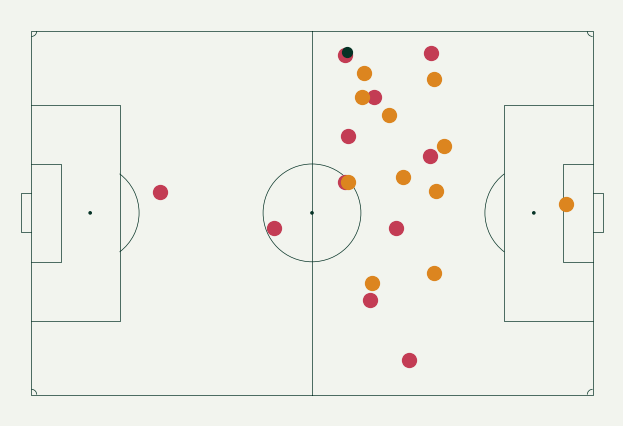

In [164]:
from viz import plot_tracking_frame
plot_tracking_frame(second_period_data, 73250)

In [166]:
from transform import get_ball_zone
get_ball_zone(6.61, 30.13)

'left_progression'

In [ ]:
tracking_data["wall_clock"].dtype # int64 represents unix timestamp in milliseconds

# How can I link the tracking data to the event data?

dtype('int64')